In [1]:
# Librería para graficar y para cargar datos
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Cargar datos de carros desde Seaborn
datos = sns.load_dataset('mpg')

In [10]:
datos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [11]:
# Convertir variables categóricas a numéricas
datos = pd.get_dummies(datos, drop_first=True)

In [12]:
datos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,True,False,...,False,False,False,False,False,False,False,False,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,False,False,False,...,False,False,False,False,False,False,True,False,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,True,False,...,False,False,False,False,False,False,False,False,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Eliminar todos los valores nulos con la media
# inplace=True significa que reemplaza la variable con el resultado
datos.fillna(datos.mean(), inplace=True)

In [15]:
X = datos.drop('mpg', axis=1)
y = datos['mpg']

In [16]:
# Calcular la tabla de gráficas
num_variables = X.shape[1]
num_filas = (num_variables + 4) // 5

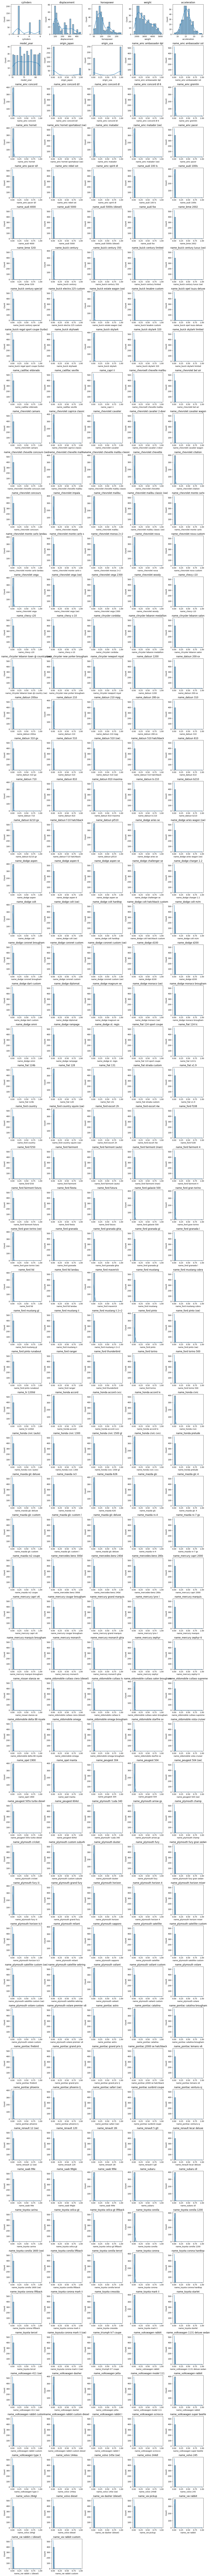

In [17]:
plt.figure(figsize=(15, 3*num_filas))
for i, columna in enumerate(X.columns):
    plt.subplot(num_filas, 5, i+1)
    sns.histplot(datos[columna], bins=20, kde=True) # Graficas bonitas
    plt.title(columna)
plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
modelo = LinearRegression()

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = modelo.predict(X_test)

In [22]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

In [23]:
r2 = r2_score(y_test, y_pred)

In [24]:
print(mse, r2)

12.912503121804807 0.7598408557232352


ValueError: num must be an integer with 1 <= num <= 12, not 13

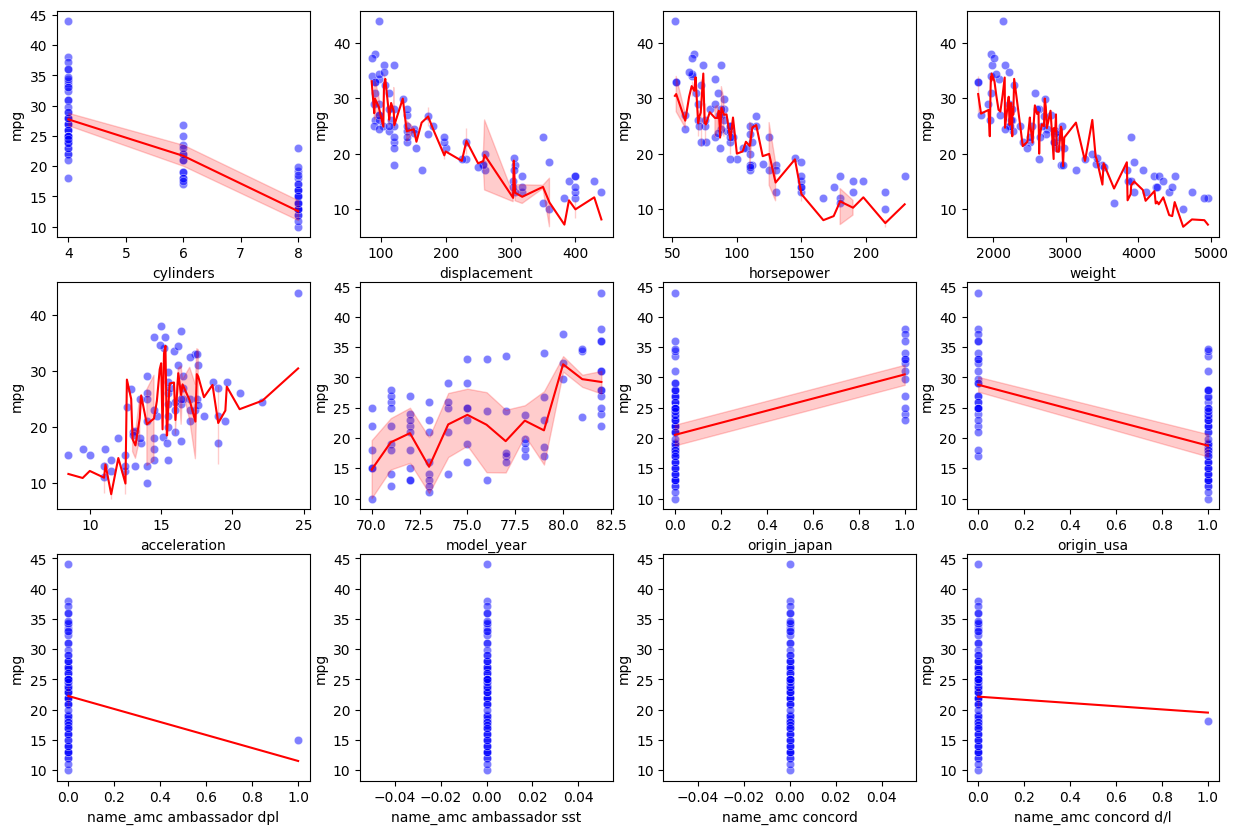

In [27]:
# Grafica de dispersión de datos
plt.figure(figsize=(15, 10))
for i, columna in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=X_test[columna], y=y_test, color='blue', alpha=0.5)
    # Verificar que al menos la columna tenga dos valores diferentes
    if len(X_test[columna].unique()) > 1:
        sns.lineplot(x=X_test[columna], y=y_pred, color='red')
    plt.xlabel(columna)
    plt.ylabel('mpg')
plt.tight_layout()
plt.show()